In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [5]:
path='/content/creditcard.csv'
df=pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,...,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0


In [6]:
df=df.drop(['Time','Class'],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,0.018355,...,-0.482614,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00
49606,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,-0.016605,...,-0.097330,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00
49607,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,0.766243,...,0.301536,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00
49608,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,0.944785,...,0.086279,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82


In [7]:
#preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xtrain,xtest=train_test_split(df,test_size=0.2)

In [10]:
print(xtrain.shape[1])
print(xtest.shape[1])
type(xtrain)

29
29


pandas.core.frame.DataFrame

In [11]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras import layers, models

In [12]:
encoder=tf.keras.models.Sequential(
    [
        layers.Input(shape=(xtrain.shape[1],)),
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(20,activation='relu')
    ]
)

decoder=tf.keras.models.Sequential(
    [
        layers.Input(shape=(20,)),
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(xtrain.shape[1],activation='linear')
    ]
)
model=tf.keras.models.Sequential([
    encoder,
    decoder
])

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
history = model.fit( xtrain, xtrain, validation_data=(xtest,xtest),epochs=5,batch_size = 100,)

Epoch 1/5
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/5
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/5
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/5
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/5
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan


<Axes: >

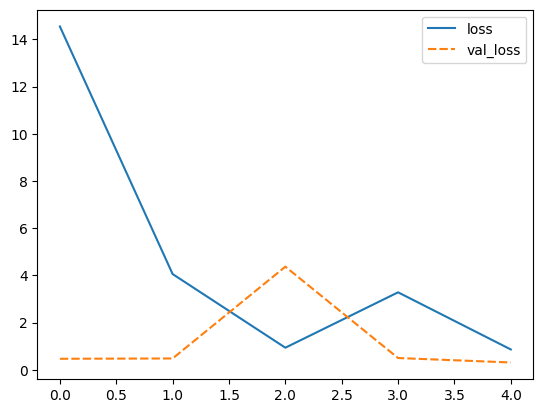

In [ ]:
import seaborn as sns
sns.lineplot(model.history.history)

In [ ]:
predictions=model.predict(xtest)
mse=np.mean(np.power(xtest-predictions,2),axis=1)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
threshold=np.percentile(mse,95)
threshold

0.9004479973508028

In [ ]:
anomalies=mse>threshold

In [ ]:
num_anomalies=np.sum(anomalies)
print(f"Number of Anomalies:{num_anomalies}")

Number of Anomalies:2849


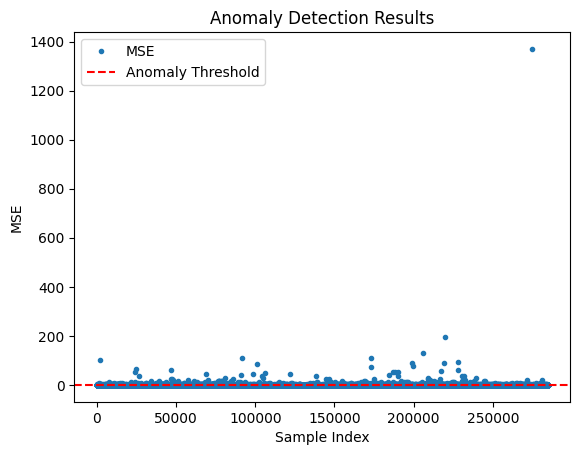

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mse,marker='o',label='MSE',linestyle='',markersize=3)
plt.axhline(threshold,color='r',linestyle='--',label='Anomaly Threshold',)
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

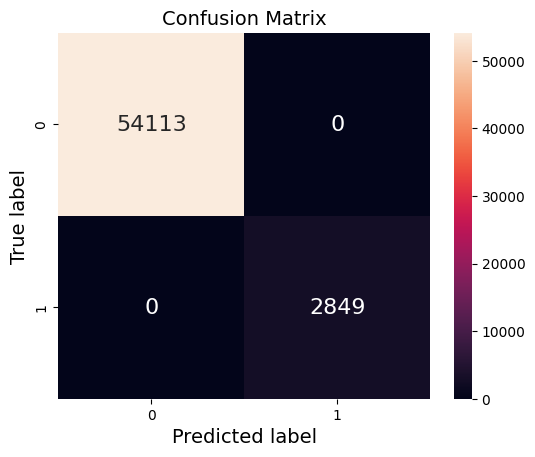

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(6,4.75))
sns.heatmap(confusion_matrix(anomalies,anomalies),annot=True,annot_kws={"size":16}, fmt='d')

plt.xlabel("Predicted label",fontsize=14)
plt.ylabel("True label",fontsize=14)
plt.title("Confusion Matrix",fontsize=14)
plt.grid(False)
plt.show()